Epoch 1/50
3/3 [==============================] - 13s 1s/step - loss: 0.2152 - val_loss: 0.1149
Epoch 2/50
3/3 [==============================] - 1s 243ms/step - loss: 0.1213 - val_loss: 0.1640
Epoch 3/50
3/3 [==============================] - 1s 182ms/step - loss: 0.1633 - val_loss: 0.0862
Epoch 4/50
3/3 [==============================] - 1s 207ms/step - loss: 0.1284 - val_loss: 0.0878
Epoch 5/50
3/3 [==============================] - 1s 217ms/step - loss: 0.1099 - val_loss: 0.0826
Epoch 6/50
3/3 [==============================] - 1s 223ms/step - loss: 0.1309 - val_loss: 0.0785
Epoch 7/50
3/3 [==============================] - 1s 187ms/step - loss: 0.1033 - val_loss: 0.0823
Epoch 8/50
3/3 [==============================] - 1s 202ms/step - loss: 0.1141 - val_loss: 0.0831
Epoch 9/50
3/3 [==============================] - 1s 254ms/step - loss: 0.1135 - val_loss: 0.0754
Epoch 10/50
3/3 [==============================] - 1s 283ms/step - loss: 0.1061 - val_loss: 0.0765
Epoch 11/50
3/3 [====

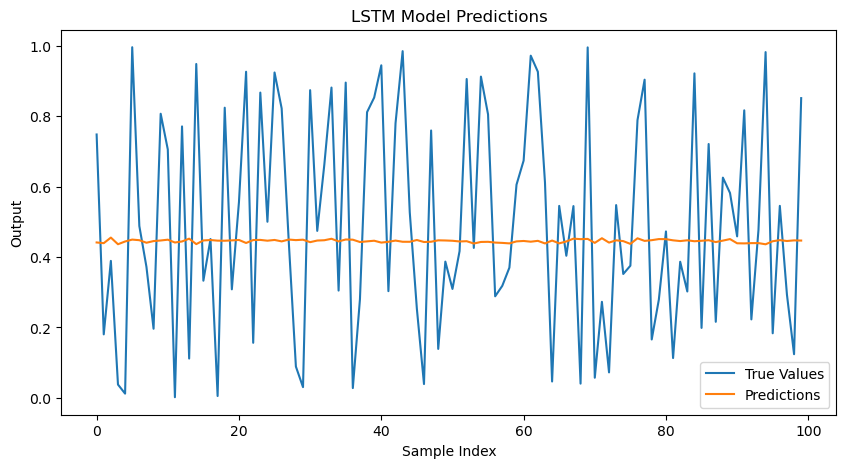

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Placeholder function for data loading and preprocessing
def load_and_preprocess_data():
    # This function should load your data and preprocess it
    # For the purpose of this example, let's create dummy data
    # Assume each sample has 100 time steps and each step has 1 feature
    np.random.seed(0)
    X = np.random.rand(100, 100, 1)  # 100 samples, 100 timesteps, 1 feature
    y = np.random.rand(100, 1)  # 100 target values
    return X, y

# Function to build the LSTM model
def build_lstm_model(input_shape, units, dropout_rate):
    model = Sequential([
        LSTM(units, return_sequences=True, input_shape=input_shape),
        Dropout(dropout_rate),
        LSTM(units, return_sequences=False),
        Dropout(dropout_rate),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
    return model

# Load and preprocess the data
X, y = load_and_preprocess_data()

# Model configuration
input_shape = (X.shape[1], X.shape[2])  # Time steps and features per timestep
units = 50  # LSTM units
dropout_rate = 0.2  # Dropout rate

# Build and compile the LSTM model
model = build_lstm_model(input_shape, units, dropout_rate)

# Train the model
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model using MSE and MAE
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
mae = mean_absolute_error(y, predictions)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Visualize the model's predictions
plt.figure(figsize=(10, 5))
plt.plot(y, label='True Values')
plt.plot(predictions, label='Predictions')
plt.title('LSTM Model Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.legend()
plt.show()

# Placeholder for hyperparameter tuning
# Implement grid search or random search here to optimize hyperparameters

